<a href="https://colab.research.google.com/github/kavithabakshi/ADNI/blob/master/ADNI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
file = "https://github.com/kavithabakshi/ADNI/blob/master/Data/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii?raw=true"

In [6]:
pip install dltk

In [0]:
import SimpleITK as sitk
import os
import tensorflow as tf
import pandas as pd
import time

from matplotlib import pyplot as plt
from dltk.io.augmentation import *
from dltk.io.preprocessing import *

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [63]:
link = 'https://drive.google.com/open?id=1JWZGDUIC6JGNG8s6NuRPNk534Qpr2Dru'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Gtest.nii')  
sitk_t1 = sitk.ReadImage('Gtest.nii')
t1 = sitk.GetArrayFromImage(sitk_t1)
print(t1.shape)
#sitk.Show(sitk_t1, title="Visible Human Head", debugOn=True)
#sitk.Show(inputImage)
# Dataset is now stored in a Pandas Dataframe
#grid_image = sitk.GridSource(t1, outputPixelType=sitk.sitkUInt16, size=(512,512),
#                             sigma=(0.1,0.1), gridSpacing=(20.0,20.0))

# Procedural interface, using the default image viewer (Fiji/ImageJ) or
# any viewer specified by the SITK_SHOW_COMMAND environment variable.
#sitk.Show(sitk_t1, title = "grid using Show function", debugOn = True)
#plt.imshow(t1)
#image_viewer = sitk.ImageViewer()
#image_viewer.SetTitle('grid using ImageViewer class')

# Use the default image viewer.
#image_viewer.Execute(grid_image)
 

1JWZGDUIC6JGNG8s6NuRPNk534Qpr2Dru
(160, 192, 192)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


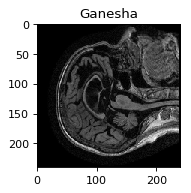

In [73]:
title="Ganesha"
margin=0.05
dpi=80
spacing = sitk_t1.GetSpacing()
if t1.ndim == 3:
        # fastest dim, either component or x
        c = t1.shape[-1]
        
        # if the number of components is 3 or 4 consider it an RGB image
        if not c in (3,4):
            t1 = t1[t1.shape[0]//2,:,:]
    
        elif t1.ndim == 4:
            c = t1.shape[-1]
            # take a z-slice
            t1 = t1[t1.shape[0]//2,:,:,:]
        

xsize = t1.shape[1]
ysize = t1.shape[0]

figsize = (1 + margin) * xsize / dpi, (1 + margin) * ysize / dpi
plt.figure(figsize=figsize, dpi=dpi, tight_layout=True)
ax = plt.gca()
extent = (0, xsize * spacing[0], ysize * spacing[1], 0)
t = ax.imshow(t1, extent=extent, interpolation=None)
t.set_cmap("gray")
plt.title(title)
plt.show()

In [0]:
myshow(t1_fn, title="Ganesha", margin=0.05, dpi=80)

In [42]:
#subject_id = meta_data[0]
#data_path = '/content/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii'
#data_path = 'https://github.com/kavithabakshi/ADNI/blob/master/Data/'
#t1_fn = os.path.join(data_path, '{}/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii')
# A path to a T1-weighted brain .nii image:
#t1_fn = '../../ADNI/Data/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii'
#https://github.com/kavithabakshi/ADNI/blob/master/Gtest.gz?raw=true
t1_fn = 'ttps://github.com/kavithabakshi/ADNI/blob/master/Gtest.nii'
# Read the .nii image containing a brain volume with SimpleITK and get 
        # the numpy array:
#sitk_t1 = sitk.ReadImage(t1_fn)
#t1 = sitk.GetArrayFromImage(sitk_t1)
sample = 'https://raw.githubusercontent.com/kavithabakshi/ADNI/master/ADNI1_Complete_1Yr_1.5T_4_14_2019.csv'
t1_fn = 'Data/ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080703170241434_S51039_I112538.nii'
sitk_t1 = sitk.ReadImage(t1_fn)
t1 = sitk.GetArrayFromImage(sitk_t1)
df = pd.read_csv(sample, delimiter = ';')

RuntimeError: ignored

TypeError: ignored

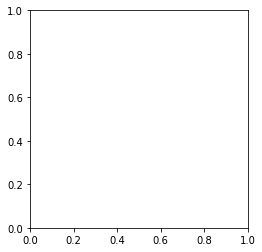

In [0]:
plt.imshow(sitk_t1)